In [73]:
from time import perf_counter as tick
import os, re
import numpy as np
import matplotlib.pyplot as mp
import scipy.interpolate as sp
import spec_funcs as sf
from scipy.fftpack import fft, fftfreq

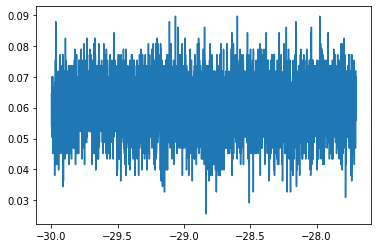

In [74]:
path = 'C:\\Users\\sk88\\Desktop\\Comp_sig\\COMP_UNF.csv'

time = []
amp = []

with open(path, 'r', newline='') as raw_file:
    for row in raw_file:
        if sf.check_str(row) == True:
            temp = re.split('\t|,|;', row)
            time.append(float(temp[0]))
            amp.append(float(temp[1]))

mp.plot(time[0:5000], amp[0:5000])

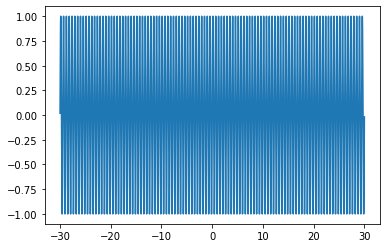

In [75]:
freq = 1.8
omega = 2*np.pi*freq
N = np.size(amp)
T= time[1] - time[0]
test_time = np.arange(start=np.min(time), stop=np.max(time)+T, step=T)
wave = np.sin(omega*test_time)

mp.plot(test_time, wave)

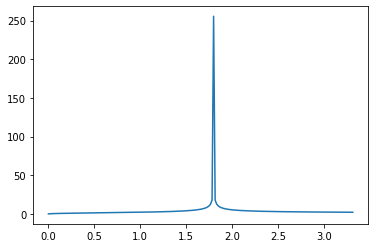

In [76]:
test_sig = fft(wave)
test_freq = fftfreq(N,T)

mp.plot(test_freq[0:200], np.sqrt(np.abs(test_sig))[0:200])

Text(0, 0.5, 'Amplitude (AU)')

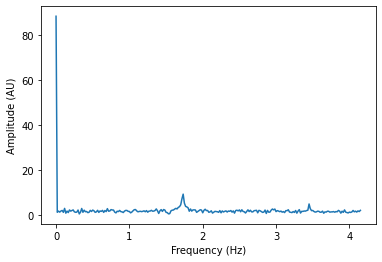

In [77]:
cryo_sig = fft(amp)
cryo_freq = fftfreq(N, T)

mp.plot(cryo_freq[0:250], np.sqrt(np.abs(cryo_sig[0:250])))
mp.xlabel('Frequency (Hz)')
mp.ylabel('Amplitude (AU)')